# National Weather Service (NWS) API in Python

by Michael T. Moen

Please see the following resources for more information on API usage:

- Documentation
    - <a href="https://www.weather.gov/documentation/services-web-api" target="_blank">NWS API Documentation</a>
- Terms of Use
    - From the documentation, "All of the information presented via the API is intended to be open data, free to use for any purpose."

**_NOTE:_** The NWS API imposes a rate limit on requests, but the amount is not published. We recommend using a 1 second delay between API requests.

*These recipe examples were tested on March 18, 2025.*

```{warning}

Example use-cases and result outputs shown are for demonstration purposes only. The displayed results are for a specific example location and are **not** current. For live and up-to-date weather data, conditions, forecasts, and alerts in U.S. locations, visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a>.

```

## Setup

### Import Libraries

The following external libraries need to be installed into your enviornment to run the code examples in this tutorial:

- <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
- <a href="https://github.com/psf/requests" target="_blank">requests</a>
- <a href="https://github.com/theskumar/python-dotenv" target="_blank">python-dotenv</a>
- <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>

We import the libraries used in this tutorial below:

In [6]:
import os
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from time import sleep
from dateutil import parser
from dotenv import load_dotenv

### Import User-Agent

An User Agent is required to access the NWS API.

We keep our User Agent in a `.env` file and use the `dotenv` library to access it. If you would like to use this method, create a file named `.env` in the same directory as this notebook and add the following line to it:

```text
NWS_USER_AGENT="Application Name, email@domain.com"
```

In [7]:
load_dotenv()
try:
    USER_AGENT = {"User-Agent": os.environ["NWS_USER_AGENT"]}
except KeyError:
    print("User-Agent key not found. Please set 'NWS_USER_AGENT' in your .env file.")

## 1. Get the 12-Hour Forecast for a Location

```{warning}

Example use-cases and result outputs shown are for demonstration purposes only. The displayed results are for a specific example location and are **not** current. For live and up-to-date weather data, conditions, forecasts, and alerts in U.S. locations, visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a>.

```

The NWS publishes weather forecasts for each of its Weather Forecast Offices. A map of these offices and the regions they cover can be found <a href="https://www.weather.gov/srh/nwsoffices" target="_blank">here</a>.

In order to obtain the forecast for a location, we must query that region's Weather Forecast Office using its code and the grid coordinates of the location. To determine these values for a location, we can query the `/points` endpoint.

*To see how to programmatically obtain the latititude and longitude of an address in the U.S., please see our <a href="https://ua-libraries-research-data-services.github.io/UALIB_ScholarlyAPI_Cookbook/src/overview/us-census-geocoding.html" target="_blank">U.S. Census Geocoding cookbook tutorials</a>.*

In [8]:
latitude = '33.211952'
longitude = '-87.545920'

url = f'https://api.weather.gov/points/{latitude},{longitude}'
response = requests.get(url, headers=USER_AGENT).json()

# Display response from API
response

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/33.212,-87.5459',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-87.5459, 33.212]},
 'properties': {'@id': 'https://api.weather.gov/poi

In [9]:
office = response["properties"]["gridId"]
gridX = response["properties"]["gridX"]
gridY = response["properties"]["gridY"]

# Print grid location data
print(f'Office code: {office}, Grid coordinates: {gridX}, {gridY}')

Office code: BMX, Grid coordinates: 33, 69


Now that we have obtained the grid coordinates and office code, we can use the `/gridpoints` endpoint to obtain the seven day forecast (*output data is for a specific location and is **not** current; visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a> for up-to-date information*).

In [10]:
url = f'https://api.weather.gov/gridpoints/{office}/{gridX},{gridY}/forecast'
response = requests.get(url, headers=USER_AGENT).json()

# Display first result
response["properties"]["periods"][0]

{'number': 1,
 'name': 'This Afternoon',
 'startTime': '2025-03-18T12:00:00-05:00',
 'endTime': '2025-03-18T18:00:00-05:00',
 'isDaytime': True,
 'temperature': 77,
 'temperatureUnit': 'F',
 'temperatureTrend': '',
 'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': None},
 'windSpeed': '10 mph',
 'windDirection': 'S',
 'icon': 'https://api.weather.gov/icons/land/day/few?size=medium',
 'shortForecast': 'Sunny',
 'detailedForecast': 'Sunny, with a high near 77. South wind around 10 mph.'}

Finally, we can print the data we are interested in. In this case, we're looking at the temperature, probability of precipitation, and detailed forecast (*output data is for a specific location and is **not** current; visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a> for up-to-date information.*).

In [11]:
for day in response["properties"]["periods"]:
    name = day["name"]
    temperature = day["temperature"]
    rain = day["probabilityOfPrecipitation"]["value"] or 0
    forecast = day["detailedForecast"]
    print(f'{name:<16}: {temperature:>3}F, {rain:>3}%, {forecast}')

This Afternoon  :  77F,   0%, Sunny, with a high near 77. South wind around 10 mph.
Tonight         :  50F,   0%, Partly cloudy, with a low around 50. South wind 5 to 10 mph.
Wednesday       :  80F,  20%, A slight chance of rain showers after 4pm. Partly sunny, with a high near 80. South wind 5 to 20 mph, with gusts as high as 40 mph. Chance of precipitation is 20%.
Wednesday Night :  43F,  90%, A slight chance of rain showers before 7pm, then showers and thunderstorms. Mostly cloudy. Low around 43, with temperatures rising to around 49 overnight. Southwest wind 15 to 20 mph, with gusts as high as 35 mph. Chance of precipitation is 90%.
Thursday        :  57F,  20%, A slight chance of rain showers before 7am. Mostly sunny, with a high near 57. Northwest wind around 15 mph, with gusts as high as 30 mph. Chance of precipitation is 20%.
Thursday Night  :  34F,   0%, Areas of frost after 3am. Mostly clear, with a low around 34.
Friday          :  67F,   0%, Widespread frost before 8am. Sun

## 2. Get the Hourly Forecast for a Location

```{warning}

Example use-cases and result outputs shown are for demonstration purposes only. The displayed results are for a specific example location and are **not** current. For live and up-to-date weather data, conditions, forecasts, and alerts in U.S. locations, visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a>.

```

The `/gridpoints` endpoint can also return an hourly forecast for a seven day period. The function below implements the code from the example above using this hourly forecast method:

In [ ]:
# Note that this function only works with valid latitude and longitude inputs
def getHourlyForecast(latitude, longitude, user_agent):
    points_data = requests.get(
        f'https://api.weather.gov/points/{latitude},{longitude}',
        headers=user_agent
    ).json()
    office = points_data["properties"]["gridId"]
    gridX = points_data["properties"]["gridX"]
    gridY = points_data["properties"]["gridY"]

    sleep(1)    # Add 1 second delay between API requests

    # The "/hourly" is the only difference between the hourly and daily forecast URLs
    gridpoints_data = requests.get(
        f'https://api.weather.gov/gridpoints/{office}/{gridX},{gridY}/forecast/hourly',
        headers=user_agent
    ).json()
    return gridpoints_data["properties"]["periods"]

The function can be easily used as such:

In [13]:
latitude = '33.211952'
longitude = '-87.545920'
hourlyForecast = getHourlyForecast(latitude, longitude, USER_AGENT)
len(hourlyForecast)

156

Lastly, we can use matplotlib to graph the temperature data (*output data is for a specific location and is **not** current; visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a> for up-to-date information*).

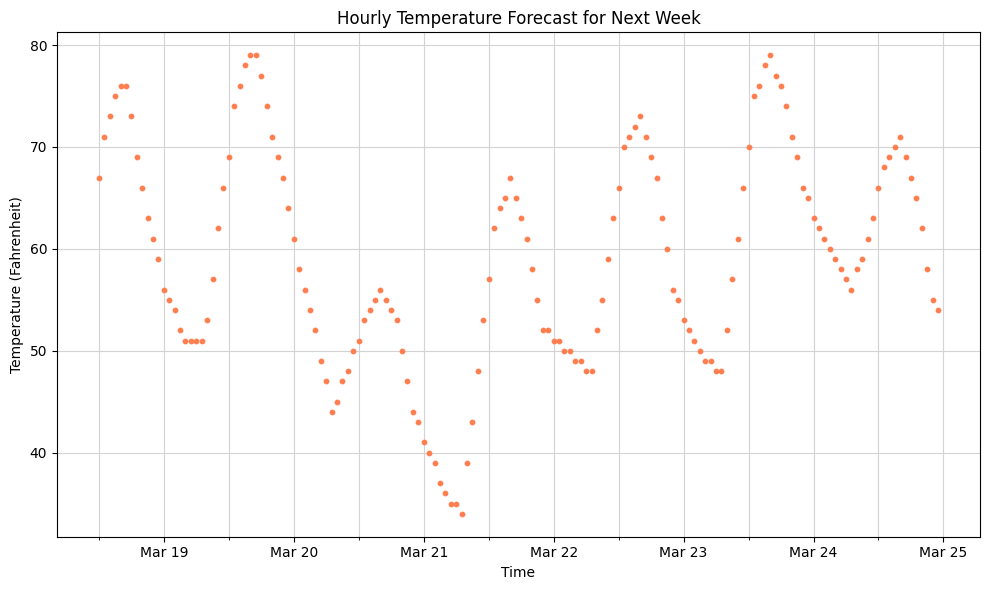

In [14]:
hours = []
temperatures = []
for hourForecast in hourlyForecast:
    hour = parser.parse(hourForecast["startTime"][:19])
    hours.append(hour)
    temperatures.append(hourForecast["temperature"])

plt.figure(figsize=(10, 6))
plt.scatter(hours, temperatures, color='coral', marker='o', s=10)
plt.title('Hourly Temperature Forecast for Next Week')
plt.xlabel('Time')
plt.ylabel('Temperature (Fahrenheit)')
plt.grid(True, which='both', color='lightgray')
plt.gca().set_axisbelow(True)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(byhour=0))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(byhour=12))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter(''))
plt.tight_layout()
plt.show()

## 3. Get Alerts for a Location

```{warning}

Example use-cases and result outputs shown are for demonstration purposes only. The displayed results are for a specific example location and are **not** current. For live and up-to-date weather data, conditions, forecasts, and alerts in U.S. locations, visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a>.

```

The `/alerts` endpoint returns all alerts issued for a given location or area. The example below uses the `point` parameter to find all alerts for a pair of coordinates:

In [15]:
latitude = '33.211952'
longitude = '-87.545920'

url = f'https://api.weather.gov/alerts/active?point={latitude},{longitude}'
response = requests.get(url, headers=USER_AGENT).json()

# Display response from API
response

{'@context': {'@version': '1.1'},
 'type': 'FeatureCollection',
 'features': [],
 'title': 'Current watches, warnings, and advisories for 33.211952 N, 87.54592 W',
 'updated': '2025-03-16T06:00:00+00:00'}

Note that in this example, there are no active alerts (*output data is for a specific location and is **not** current; visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a> for up-to-date information*).

The example below uses the `area` parameter to find alerts for the state of Alabama:

In [19]:
state = 'AL'

url = f'https://api.weather.gov/alerts/active?area={state}'
response = requests.get(url, headers=USER_AGENT).json()

# Display response from API
response['features'][0]

{'id': 'https://api.weather.gov/alerts/urn:oid:2.49.0.1.840.0.d145346f3c3070bb10d01a7710d996f0af42b811.002.1',
 'type': 'Feature',
 'geometry': None,
 'properties': {'@id': 'https://api.weather.gov/alerts/urn:oid:2.49.0.1.840.0.d145346f3c3070bb10d01a7710d996f0af42b811.002.1',
  '@type': 'wx:Alert',
  'id': 'urn:oid:2.49.0.1.840.0.d145346f3c3070bb10d01a7710d996f0af42b811.002.1',
  'areaDesc': 'Sumter; Greene; Hale',
  'geocode': {'SAME': ['001119', '001063', '001065'],
   'UGC': ['ALZ030', 'ALZ031', 'ALZ032']},
  'affectedZones': ['https://api.weather.gov/zones/forecast/ALZ030',
   'https://api.weather.gov/zones/forecast/ALZ031',
   'https://api.weather.gov/zones/forecast/ALZ032'],
  'references': [{'@id': 'https://api.weather.gov/alerts/urn:oid:2.49.0.1.840.0.331166db4f629ec07acf588dc6319f70d2510651.001.1',
    'identifier': 'urn:oid:2.49.0.1.840.0.331166db4f629ec07acf588dc6319f70d2510651.001.1',
    'sender': 'w-nws.webmaster@noaa.gov',
    'sent': '2025-03-19T03:18:00-05:00'}],
  'se

In [20]:
for event in response['features']:
    print(event['properties']['headline'])

Wind Advisory issued March 19 at 10:21AM CDT until March 19 at 10:00PM CDT by NWS Birmingham AL
Wind Advisory issued March 19 at 10:21AM CDT until March 19 at 10:00PM CDT by NWS Birmingham AL
Freeze Watch issued March 19 at 10:21AM CDT until March 21 at 8:00AM CDT by NWS Birmingham AL
Freeze Watch issued March 19 at 10:21AM CDT until March 21 at 8:00AM CDT by NWS Birmingham AL
Wind Advisory issued March 19 at 10:01AM CDT until March 19 at 10:00PM CDT by NWS Huntsville AL
Freeze Watch issued March 19 at 10:01AM CDT until March 21 at 8:00AM CDT by NWS Huntsville AL
Flood Warning issued March 19 at 9:27AM CDT until March 22 at 7:00PM CDT by NWS Mobile AL
Flood Warning issued March 19 at 9:26AM CDT until March 23 at 1:00AM CDT by NWS Mobile AL
